<span style='font-size:xx-large'>Math 187B: Mathematics of modern cryptography</span>

<span style='font-size:xx-large'>UC San Diego, Spring 2025</span>



# <span style='font-size:x-large'>Presentation: Babai's algorithm</span><span style='font-size:large'> </span>



<span style='font-size:large'>Introduction & Motivation</span>


<span style='font-size:large'>What is the Closest Vector Problem \(CVP\)?</span>

Given a lattice "L" and target vector "t",  find the lattice point v closest to t.


<span style='font-size:medium'>What is a Lattice?</span>

<img src="https://cocalc.com/blobs/paste-0.6292697083051142?uuid=2c5fc3d4-304f-44d8-8c52-02c175a33b02"   width="223px"  height="67px"  style="object-fit:cover"/>


Example:

<img src="https://cocalc.com/blobs/paste-0.9249362815049889?uuid=edc6e56b-ce2d-453c-9a61-573105fbdab2"   width="165px"  height="48px"  style="object-fit:cover"/>

<img src="https://cocalc.com/blobs/paste-0.6273765914342565?uuid=0201fbd5-218f-4987-af35-6f4a55687566"   width="250px"  height="34px"  style="object-fit:cover"/>



In [0]:
z1(1,4)+z2(2,1)
z1+2z2,4z1+z2

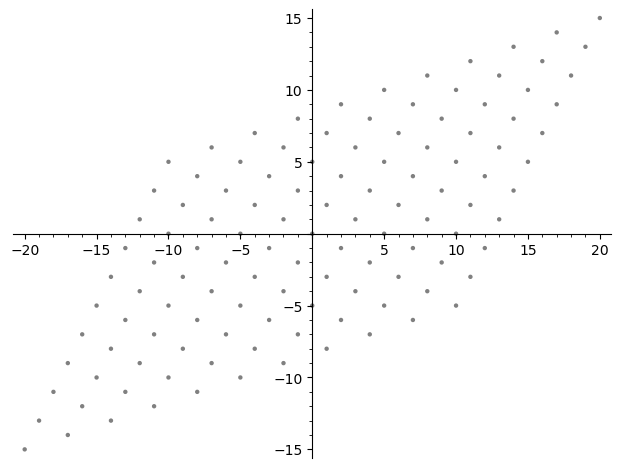

In [5]:
# Example of a lattice in 2D
# Define a lattice basis matrix
B = Matrix(ZZ, [[3, 1], [1, 2]])
lattice_points = [B * vector(ZZ, (i, j))
                  for i in range(-5, 6)
                  for j in range(-5, 6)]

# Plot the lattice points
pts = point(lattice_points, size=10, color='gray')
pts.show(aspect_ratio=1)



<span style='font-size:x-large'>**\*\*\* Participation Check \*\*\***</span>

B = Matrix\(ZZ, \[\[2, 1\], \[1, 3\]\]\) in range\(\-2,3\)

a\) Compute and list 10 lattice points generated from B

b\) Plot the lattice points in the region\[−5,5\]×\[−5,5\] in size 20.

c\) Explain how the shape of the lattice changes if we use the basis: B2 = Matrix\(ZZ, \[\[2, 0\], \[0, 2\]\]\)



In [6]:
B = Matrix(ZZ, [[2, 1], [1, 3]])
lattice_points = [B * vector(ZZ, (i, j)) for i in range(-2, 3) for j in range(-2, 3)]
lattice_points[:10]


[(-6, -8),
 (-5, -5),
 (-4, -2),
 (-3, 1),
 (-2, 4),
 (-4, -7),
 (-3, -4),
 (-2, -1),
 (-1, 2),
 (0, 5)]

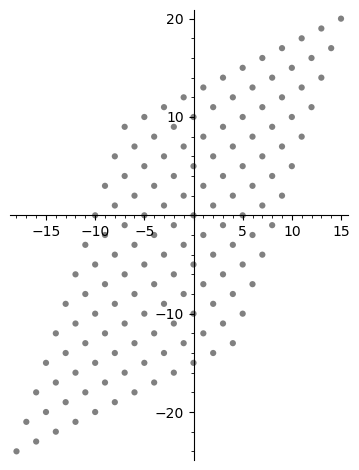

In [4]:
B = Matrix(ZZ, [[2, 1], [1, 3]])
lattice_points = [B * vector(ZZ, (i, j)) for i in range(-6, 6) for j in range(-6, 6)]
pts = point(lattice_points, size=20, color='gray')
pts.show(aspect_ratio=1)


c\)

i. What geometric shape do you observe with B vs. B2? With B, the lattice points form a skewed parallelogram grid. The basis vectors are not orthogonal \(they’re slanted\), so the fundamental domain is a parallelogram. With B2

, the lattice is a perfect square grid, because the basis vectors are orthogonal \(90° angle\) and have equal length.

ii. Which basis generates a more “regular” grid and why?

B2 generates the more regular grid: It forms squares aligned with the coordinate axes. It’s easier to work with in terms of geometry, projection, and approximations. B creates a more "oblique" grid, which is typical in applications but harder for approximations like Babai’s algorithm.



<span style='font-size:large'>Mathematical Foundations</span>



<span style='font-size:medium'>Lattice = integer combinations of basis vectors </span>

L\(B\)={Bz∣z∈Z^n}


Basis quality matters: short, nearly orthogonal = good

Gram\-Schmidt Orthogonalization \(GSO\) is key


Given Basis: 𝐵= \[1,...,𝑏𝑛\]

Compute orthogonal basis 𝐵∗=\[𝑏1∗,…,𝑏𝑛∗\]



In [7]:
def gram_schmidt(B):
    n = len(B)
    B_star = []
    for i in range(n):
        proj = sum(np.dot(B[i], B_star[j]) / np.dot(B_star[j], B_star[j]) * B_star[j] for j in range(i))
        B_star.append(B[i] - proj)
    return np.array(B_star)


In [15]:
# Define basis and compute GSO
B = Matrix(RDF, [[3, 1], [1, 2]])#RDF is Real Double Field
B_gso = B.gram_schmidt()
B_gso


(
[  -0.948683298050514 -0.31622776601683794]
[-0.31622776601683794   0.9486832980505138],

[-3.1622776601683795                 0.0]
[  -1.58113883008419  1.5811388300841895]
)

<span style='font-size:x-large'>Babai’s Nearest Plane Algorithm</span>

<span style='font-size:small'>Project t onto hyperplanes and round coefficients.</span>



In [9]:
def babai_nearest_plane(B, t):
    B = Matrix(RDF, B)
    B_gso, _ = B.gram_schmidt()
    v = vector(RDF, [0]*B.nrows())
    r = vector(RDF, t)
    for i in reversed(range(B.nrows())):
        mu = r.dot_product(B_gso[i]) / B_gso[i].norm()^2
        ci = round(mu)
        r -= ci * B[i]
        v += ci * B[i]
    return v


<span style='font-size:x-large'>**\*\*\* Participation Check \*\*\***</span>

<img src="https://cocalc.com/blobs/paste-0.5916577928213422?uuid=01204ffc-878e-48ab-ac7e-f785cb5bd2b7"   width="191px"  height="47px"  style="object-fit:cover"/>, find nearest vector v



In [10]:
B = [[3, 1], [2, 2]]
t = [4.5, 3.7]
nearest = babai_nearest_plane(B, t)
print("Nearest vector:", nearest)

Nearest vector: (4.0, 4.0)


B3 = Matrix\(ZZ, \[\[4,1,2\], \[1,3,2\], \[0,2,3\]\]\)



In [11]:
#Example for 3‑D lattice 
import numpy as np 
B3 = Matrix(ZZ, [[4,1,2], [1,3,2], [0,2,3]])
def gram_schmidt(B):
    """Return list of Gram‑Schmidt vectors (no normalization)."""
    n = B.nrows()
    B_ = []
    for i in range(n):
        proj = sum((B[i].dot_product(B_[j]) / B_[j].dot_product(B_[j])) * B_[j]
                   for j in range(i))
        B_.append(B[i] - proj)
    return B_

def babai_nearest_plane(B, t):
    """Babai’s algorithm: nearest lattice vector to t with basis B."""
    B  = Matrix(RDF, B)
    B_ = gram_schmidt(B)
    v  = vector(RDF, [0]*B.nrows())
    r  = vector(RDF, t)
    for i in reversed(range(B.nrows())):
        mu = r.dot_product(B_[i]) / B_[i].norm()**2
        ci = round(mu)
        r -= ci * B[i]
        v += ci * B[i]
    return v

t3 = vector(RDF, np.random.uniform(-5, 5, 3))#random

v_babai = babai_nearest_plane(B3, t3)

print("Target t  :", t3)
print("Babai v   :", v_babai)
print("‖t − v‖   :", (t3 - v_babai).norm())

Target t  : (-0.8886731649812223, -3.511393755422633, -0.7637382682032845)
Babai v   : (-2.0, -4.0, -1.0)
‖t − v‖   : 1.2367712004992817


In [12]:
lattice_pts = [
        B3 * vector(ZZ, (i, j, k))
        for i in range(-2, 3)
        for j in range(-2, 3)
        for k in range(-2, 3)
    ]

g = Graphics()
for p in lattice_pts:
    g += point3d(p, size=20, rgbcolor=(0.7, 0.7, 0.7))  # gray lattice pts
g += point3d(t3,      size=50, rgbcolor='red')          # target t
g += point3d(v_babai, size=50, rgbcolor='green')        # Babai v

g.show(frame=True, aspect_ratio=1)
print("3‑D plot skipped:", e)

Graphics3d Object

3‑D plot skipped: e


<span style='font-size:x-large'>Visualization</span>


In [13]:
#Example
B = Matrix(ZZ, [[4, 1], [2, 3]])
t = vector(RDF, [5.1, 6.8])
v_approx = babai_nearest_plane(B, t)
v_approx

(4.0, 6.0)

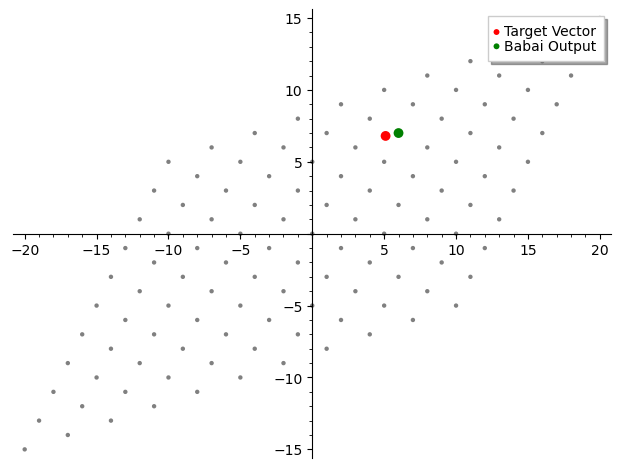

In [14]:
# Define lattice basis
B = Matrix(ZZ, [[3, 1], [1, 2]])

# Generate lattice points within a region
lattice_points = [B * vector(ZZ, (i, j)) 
                  for i in range(-5, 6) 
                  for j in range(-5, 6)]

# Create target and Babai's output
t = vector(RDF, [5.1, 6.8])
v_approx = babai_nearest_plane(B, t)

# Plot
pts = point(lattice_points, size=10, color='gray')
pt_target = point(t, color='red', size=50, legend_label='Target Vector')
pt_babai = point(v_approx, color='green', size=50, legend_label='Babai Output')

# Combine and show
(pts + pt_target + pt_babai).show(aspect_ratio=1, legend_loc='upper right')



<span style='font-size:x-large'>Summary</span>

Lattices are grids of integer combinations of basis vectors.

The Closest Vector Problem is hard but approximated by Babai’s algorithm.

The algorithm projects to successive hyperplanes using Gram\-Schmidt.

Applications: cryptography \(LWE, NTRU\), coding theory.



<span style='font-size:x-large'>Q&A</span>



souces

[https://en.wikipedia.org/wiki/Graph\_isomorphism\_problem](https://en.wikipedia.org/wiki/Graph_isomorphism_problem) 

[https://www.math.auckland.ac.nz/~sgal018/crypto\-book/ch18.pdf](https://www.math.auckland.ac.nz/~sgal018/crypto-book/ch18.pdf) 
